Data Loading and Cleaning:

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv'
df = pd.read_csv(url)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


We can already observe that there are 5 columns with missind data

In [4]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [5]:
#Check what column types we have
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [6]:
df.isnull().sum() #missing data check

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [8]:
# Replace missing numerical values with mean
num_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for column in num_columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Replace missing categorical values with mode (most frequent)
cat_columns = ['sex']
for column in cat_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [9]:
df.isnull().sum() #check

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [10]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
339    False
340    False
341    False
342    False
343    False
Length: 344, dtype: bool

In [11]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex, year]
Index: []


No duplicate rows detected.

Exploratory Data Analysis (EDA):

In [12]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.443643,1.969027,14.020657,799.613058,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.275000,15.600000,190.000000,3550.000000,2007.000000
50%,44.250000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [13]:
# Unique values and counts for categorical columns
categorical_columns = ['species', 'island', 'sex', 'year']
for column in categorical_columns:
    unique_values = df[column].unique()
    value_counts = df[column].value_counts()
    print(f"Column: {column}")
    print("Unique Values:")
    print(unique_values)
    print("Value Counts:")
    print(value_counts)
    print("-------------------------------")

Column: species
Unique Values:
['Adelie' 'Gentoo' 'Chinstrap']
Value Counts:
Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64
-------------------------------
Column: island
Unique Values:
['Torgersen' 'Biscoe' 'Dream']
Value Counts:
Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64
-------------------------------
Column: sex
Unique Values:
['male' 'female']
Value Counts:
male      179
female    165
Name: sex, dtype: int64
-------------------------------
Column: year
Unique Values:
[2007 2008 2009]
Value Counts:
2009    120
2008    114
2007    110
Name: year, dtype: int64
-------------------------------


Data Distribution and Ranges

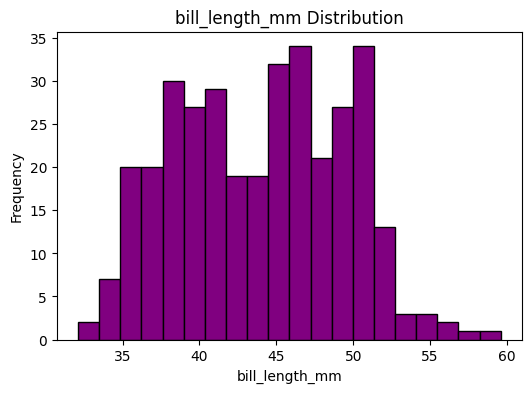

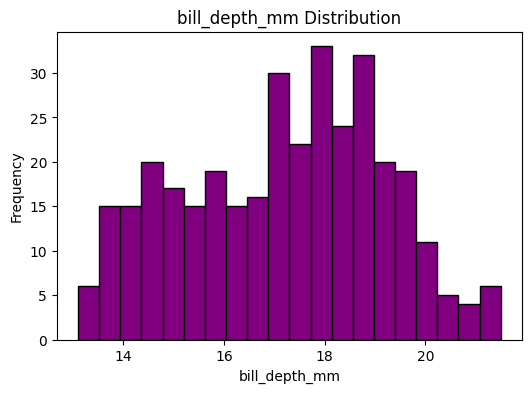

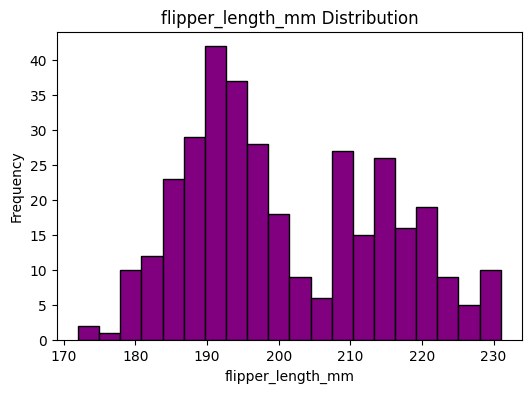

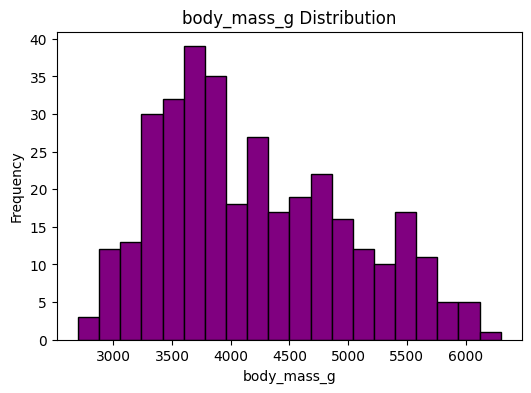

bill_length_mm Range: 32.1 to 59.6
bill_depth_mm Range: 13.1 to 21.5
flipper_length_mm Range: 172.0 to 231.0
body_mass_g Range: 2700.0 to 6300.0


In [25]:
import matplotlib.pyplot as plt

num_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'] #only numerical columns

# Histograms for numerical columns
for column in num_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df[column], bins=20, edgecolor='black', color ='purple')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'{column} Distribution')
    plt.show()

# Range of numerical columns
for column in num_columns:
    min_val = df[column].min()
    max_val = df[column].max()
    print(f"{column} Range: {min_val} to {max_val}")

Visualization Tasks:

Species Distribution:

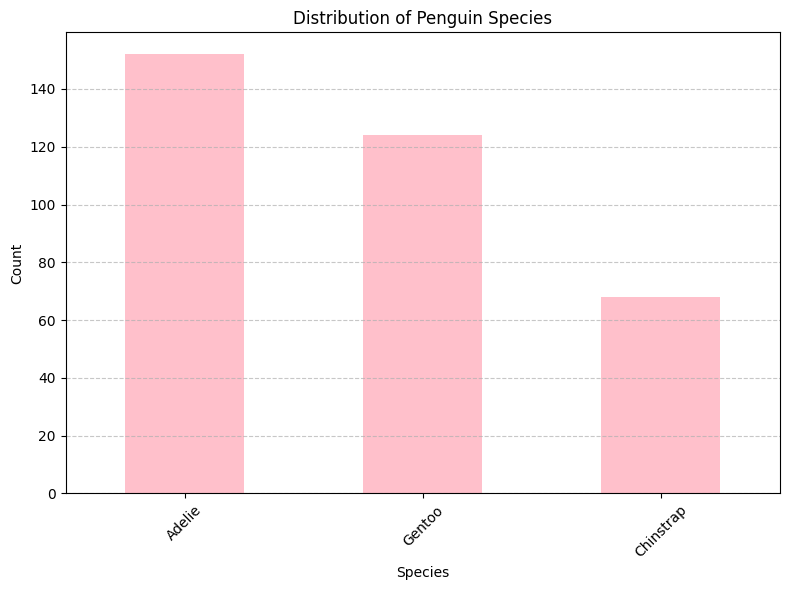

In [20]:
species_counts = df['species'].value_counts()

plt.figure(figsize=(8, 6))
species_counts.plot(kind='bar', color='pink')
plt.title('Distribution of Penguin Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Flipper Length vs. Body Mass:

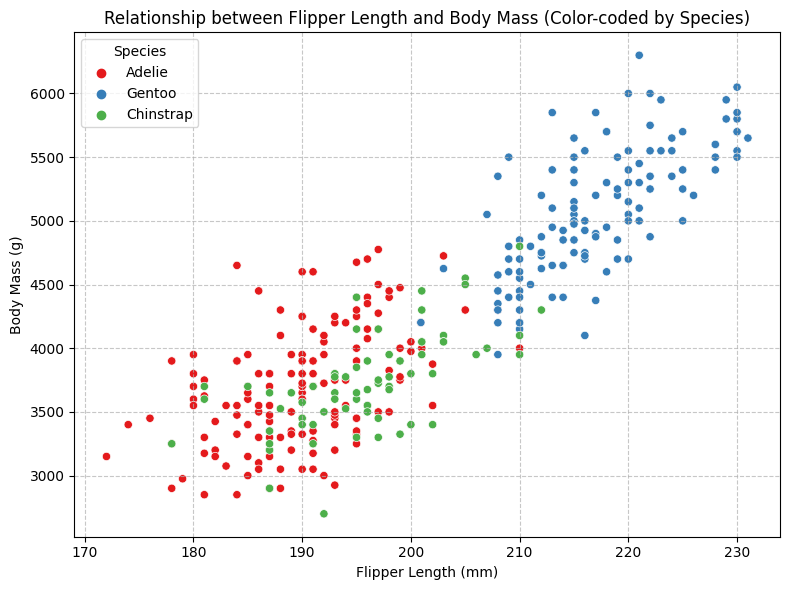

In [21]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='species', data=df, palette='Set1')
plt.title('Relationship between Flipper Length and Body Mass (Color-coded by Species)')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.legend(title='Species')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We can observe that the longer the length of flippers, the higher the body mass in all species of penguins.

Island Distribution:

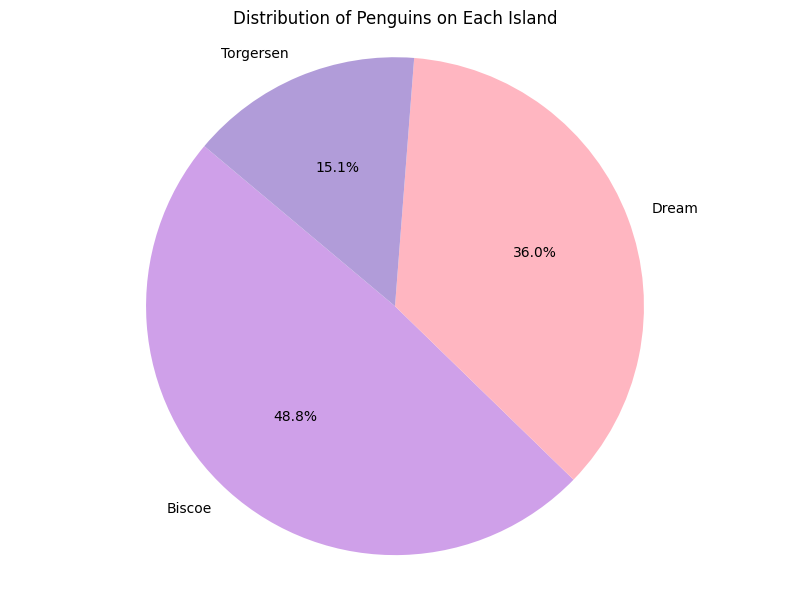

In [24]:
island_counts = df['island'].value_counts()
pastel_colors = ['#CFA0E9', '#FFB6C1', '#B19CD9']

plt.figure(figsize=(8, 6))
plt.pie(island_counts, labels=island_counts.index, autopct='%1.1f%%', startangle=140, colors=pastel_colors)
plt.title('Distribution of Penguins on Each Island')
plt.axis('equal')
plt.tight_layout()
plt.show()

We can observe that the largest count of penguins is on Biscoe Island (48.8%), followed by Dream Island (36%), and finally, Torgersen Island (15.1%)

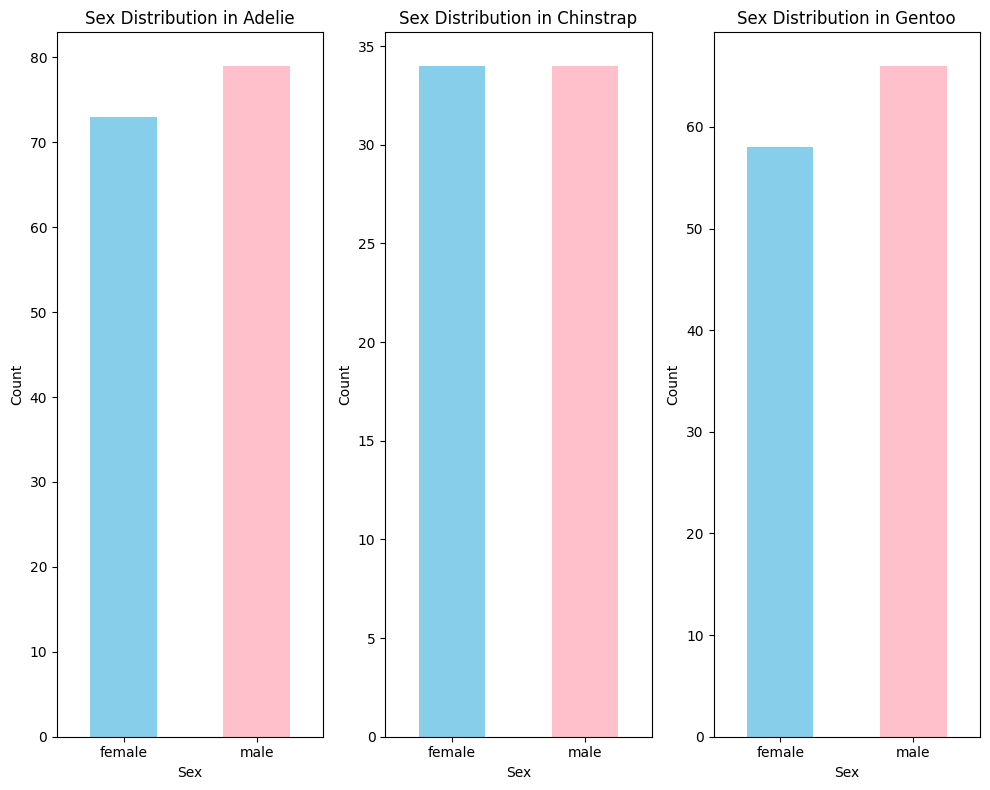

In [30]:
sex_distribution = df.groupby(['species', 'sex']).size().unstack()

plt.figure(figsize=(10, 8))

for i, species in enumerate(sex_distribution.index):
    plt.subplot(1, 3, i + 1) #a single row (1) with three columns (3) of subplots, and during each iteration, it's selecting the subplot at position i + 1
    sex_distribution.loc[species].plot(kind='bar', color=['skyblue', 'pink'])
    plt.title(f'Sex Distribution in {species}')
    plt.xlabel('Sex')
    plt.ylabel('Count')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

Heatmap of Correlations:

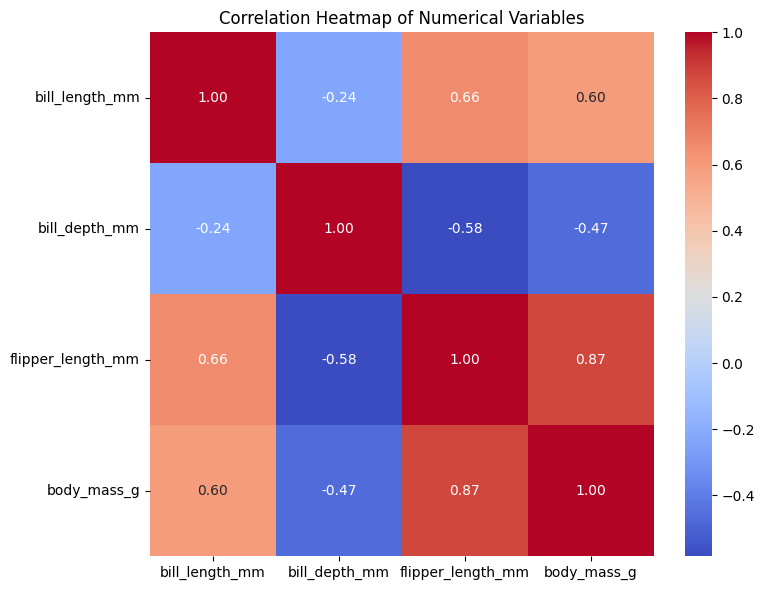

In [31]:
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Calculating correlations
correlation_matrix = df[numerical_columns].corr()

# Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

We can observe the strongest correlation between the length of the flipper and body mass, indicated by R = 0.87, signifying a robust positive relationship between these two variables. As one variable increases, the other tends to increase as well. Following this, we notice a correlation of R = 0.66 between the length of the flipper and the length of the bill, which is also positive.

Next, we observe the relationship between body mass and the length of the bill (R = 0.6), which is similarly positive. Conversely, there exists a negative correlation of R = -0.58 between the length of the flipper and the depth of the bill, suggesting that as one variable increases, the other tends to decrease. Similarly, the relationship between body mass and the depth of the bill is negative (R = -0.47).

Lastly, the weakest correlation or possibly no linear relationship is evident between the depth and length of the bill (R = -0.27), showing a negative association. Across all variables, we note correlations among each other.

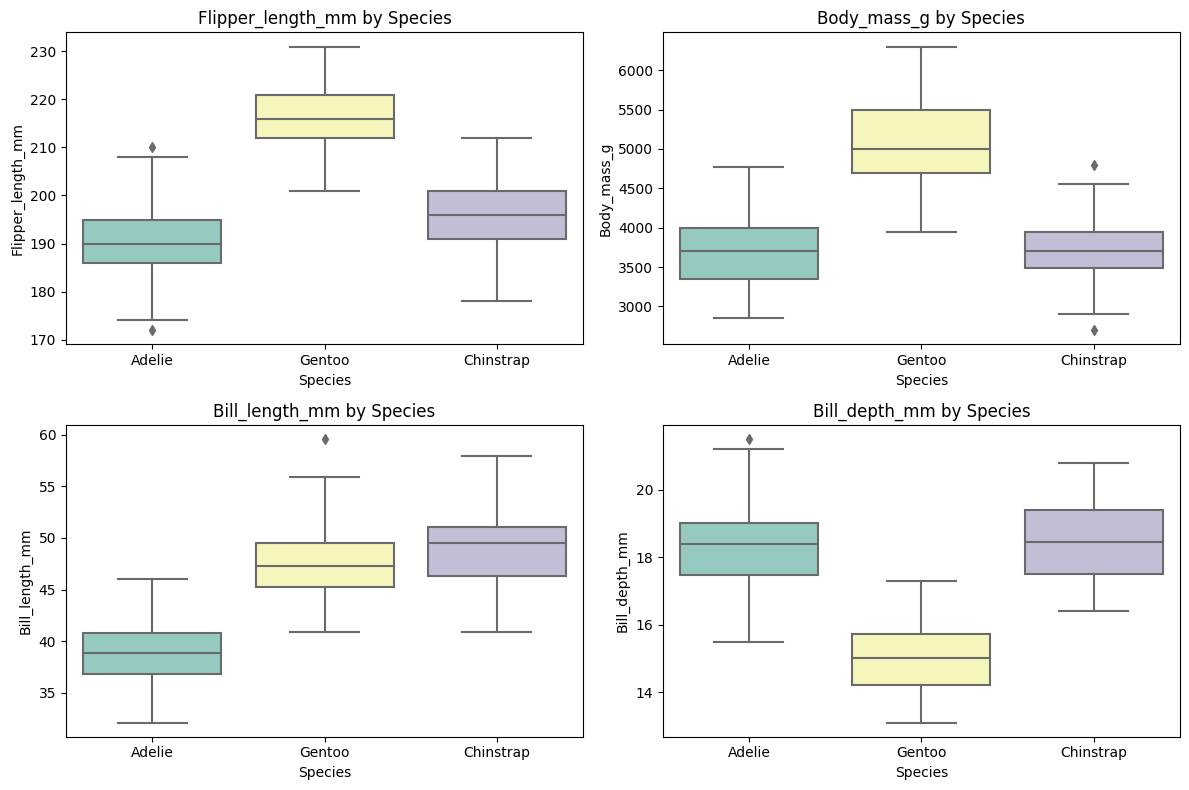

In [32]:
measurements = ['flipper_length_mm', 'body_mass_g', 'bill_length_mm', 'bill_depth_mm']

# Creating boxplots segmented by species
plt.figure(figsize=(12, 8))
for i, measurement in enumerate(measurements, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=measurement, data=df, palette='Set3')
    plt.title(f'{measurement.capitalize()} by Species')
    plt.xlabel('Species')
    plt.ylabel(measurement.capitalize())

plt.tight_layout()
plt.show()

In these plots, we observe the measurements of flipper length, body mass, bill length, and bill depth for each species. The median (represented by the line in the box) for each characteristic of every species is visible. The box indicates the interquartile range (IQR), spanning from the 25th percentile (Q1) to the 75th percentile (Q3) of the data, portraying where the middle 50% of the data lies. Additionally, the presence of whiskers and outliers is noticeable.

Let's briefly interpret each variable:

Flipper Length:

The highest scores are seen in the Gentoo species, followed by Chinstrap, and Adelie ranks last.
The largest variability is observed within the Adelie species, which is also the only species with outliers.
Body Mass:

The highest scores are observed in the Gentoo species, followed by Adelie, with Chinstrap having the lowest scores.
Gentoo displays the largest box (interquartile range) and variability, while Chinstrap is the only species with outliers.
Bill Length:

The highest scores are observed in the Chinstrap species, followed by Gentoo (the only species with an outlier), and Adelie ranks last.
Chinstrap exhibits the highest variability among the species.
Bill Depth:

The median values of Adelie and Chinstrap species are similar, with Gentoo having the lowest scores.
Adelie shows the highest variability and is the only species with outliers."
This version provides concise interpretations of each variable's distribution across different penguin species, focusing on their comparative aspects and highlighting key observations for each measurement.


Histograms of Measurements:

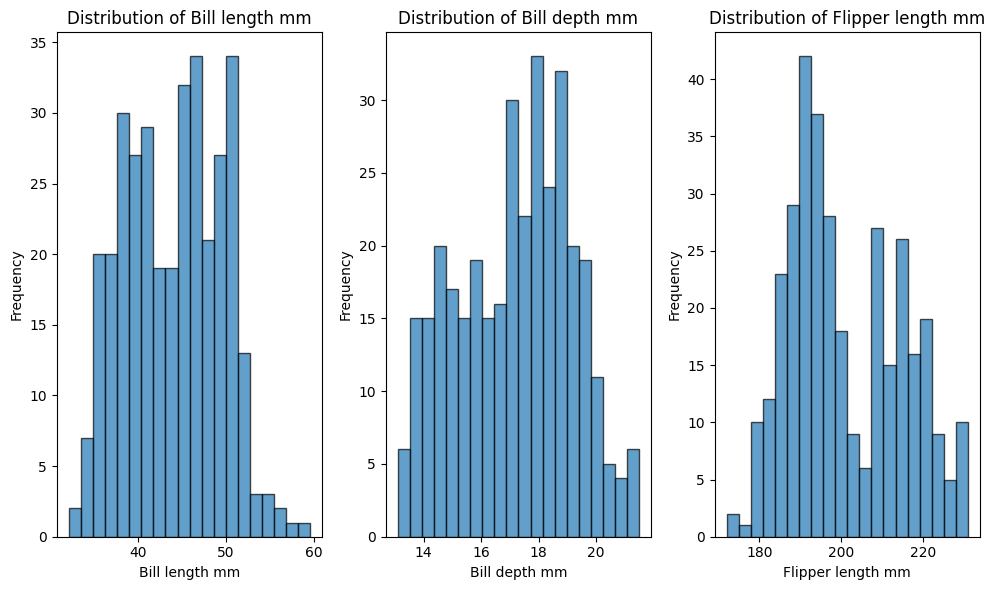

In [33]:
measurements = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']

# Creating histograms for key measurements
plt.figure(figsize=(10, 6))
for i, measurement in enumerate(measurements, 1):
    plt.subplot(1, 3, i)
    plt.hist(df[measurement], bins=20, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {measurement.replace("_", " ").capitalize()}')
    plt.xlabel(measurement.replace("_", " ").capitalize())
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Insightful Visualizations:

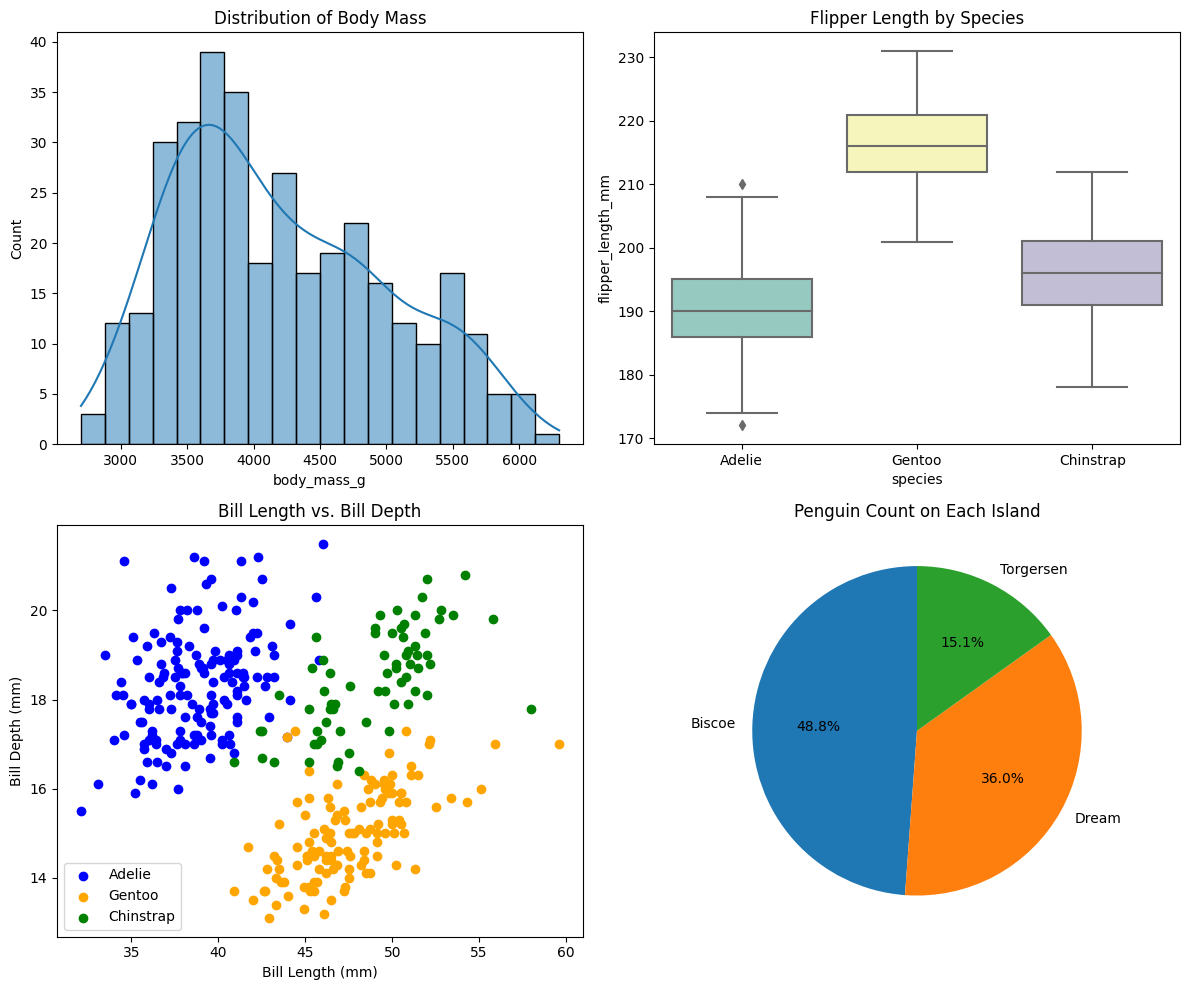

In [47]:
# Creating subplots to compare different aspects of the data
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Histogram of Body Mass
sns.histplot(df['body_mass_g'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Body Mass')

# Boxplot of Flipper Length by Species
sns.boxplot(x='species', y='flipper_length_mm', data=df, palette='Set3', ax=axes[0, 1])
axes[0, 1].set_title('Flipper Length by Species')

# Scatterplot of Bill Length vs. Bill Depth colored by Species
for species, color in zip(df['species'].unique(), ['blue', 'orange', 'green']):
    species_data = df[df['species'] == species]
    axes[1, 0].scatter(species_data['bill_length_mm'], species_data['bill_depth_mm'], label=species, color=color)
axes[1, 0].set_title('Bill Length vs. Bill Depth')
axes[1, 0].set_xlabel('Bill Length (mm)')
axes[1, 0].set_ylabel('Bill Depth (mm)')
axes[1, 0].legend()

# Pie chart of Penguin Count on Each Island
island_counts = df['island'].value_counts()
axes[1, 1].pie(island_counts, labels=island_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Penguin Count on Each Island')

# Adjusting layout
plt.tight_layout()
plt.show()

This allows for a comparison of various aspects of the penguin dataset in a single figure with multiple subplots.

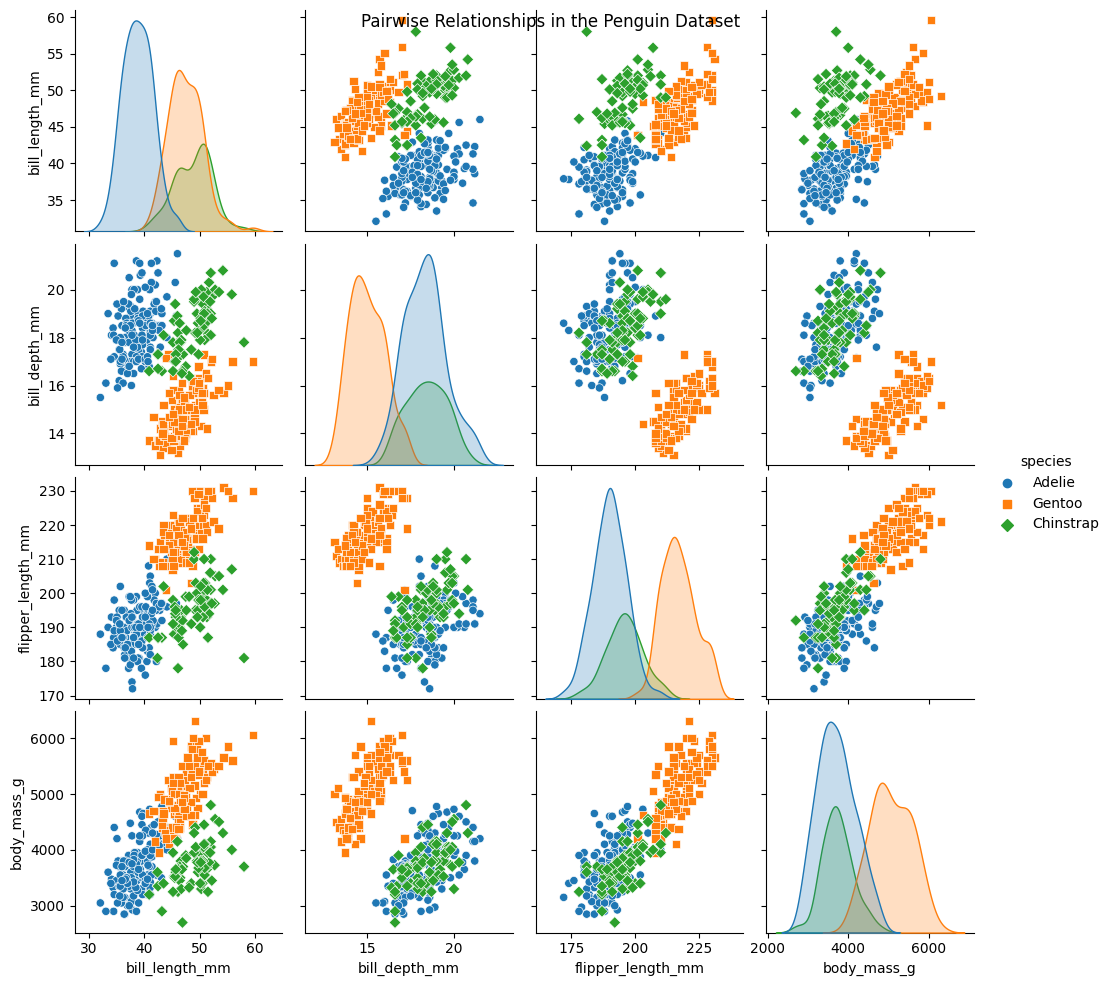

In [45]:
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Visualizing pairwise relationships among selected numerical columns with markers for species
sns.pairplot(df[numerical_columns + ['species']], hue='species', markers=["o", "s", "D"])
plt.suptitle('Pairwise Relationships in the Penguin Dataset')
plt.show()

The diagonal plots display the distribution of each numerical variable along the diagonal. They illustrate how the data is distributed for each individual feature.

In each variable, we notice that Adelie has the highest scores, while Chinstrap has the lowest.

Scatterplots depict the relationship between pairs of variables. Each point represents a penguin, and its position on the plot corresponds to the values for the respective pair of variables. The color and marker style distinguish between different penguin species.

When observing the relationship between body mass and flipper length, body mass and bill depth, and flipper length and bill depth, we notice that points for two species, Adelie and Chinstrap, consistently cluster together and exhibit a certain trend in specific scatterplots. This pattern might suggest a strong relationship between those variables for those species.

In the analysis of the relationship between body mass and flipper length, we also observe a common trend across three species: a positive relationship between the two variables (higher flipper length corresponds to higher body mass).

Conversely, when observing the relationship between bill depth and body mass, and bill depth and flipper length, we observe a negative relationship (lower value in one variable corresponds to a higher value in the other).

Regarding the relationship between bill length and bill depth, we note variations in the spread of points across scatterplots. This variation could indicate different degrees of correlation or association between variables across species.